In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.backends.backend_pdf

In [21]:
%matplotlib inline

In [22]:
fs = (5, 4)

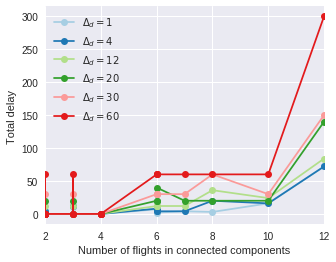

In [23]:
data = pd.read_csv('data/icm_2.txt', sep='\t', header=range(7))
data = data.reset_index()
data.columns = ['nf', '$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']
data.set_index('nf', inplace=True)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')

ax.set_xlabel('Number of flights in connected components')
ax.set_ylabel('Total delay ');

pdf = matplotlib.backends.backend_pdf.PdfPages('qubo_icm_2.pdf');
pdf.savefig(figure=fig);
pdf.close();

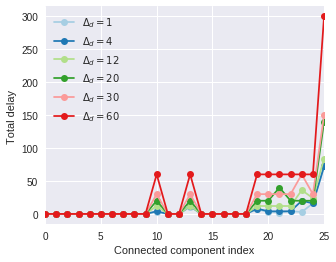

In [24]:
data = pd.read_csv('data/icm_3.txt', sep='\t', header=range(7))
data = data.reset_index()
data.columns = ['nf', '$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']
data.set_index('nf', inplace=True)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')

ax.set_xlabel('Connected component index')
ax.set_ylabel('Total delay ');

pdf = matplotlib.backends.backend_pdf.PdfPages('qubo_icm_3.pdf');
pdf.savefig(figure=fig);
pdf.close();

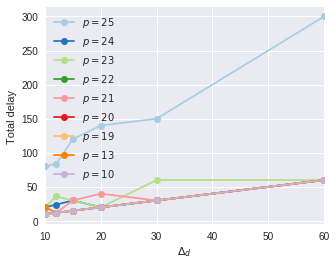

In [25]:
data = pd.read_csv('data/icm_4.txt', sep='\t', header=range(10))
data = data.reset_index()
data.columns = ['deltad', '$p=25$', '$p=24$', '$p=23$', '$p=22$', '$p=21$', '$p=20$', '$p=19$', '$p=13$', '$p=10$']
data.set_index('deltad', inplace=True)
seaborn.set_palette("Paired", n_colors=9)

fig = plt.figure(figsize=fs)
ax = fig.add_subplot(1, 1, 1)
data.plot(ax=ax, style='o-')
ax.set_xlabel('$\Delta_d$')
ax.set_ylabel('Total delay ');
pdf = matplotlib.backends.backend_pdf.PdfPages('qubo_icm_4.pdf');
pdf.savefig(figure=fig);
pdf.close();

In [26]:
data = pd.read_csv('data/icm_3.txt', sep='\t', header=range(7))
data = data.reset_index()
data.columns = ['p', 1, 4, 12, 20, 30, 60]
data.set_index('p', inplace=True)
data.tail()

,1,4,12,20,30,60
p,,,,,,
21,2,4,12,40,30,60
22,4,4,12,20,30,60
23,3,20,36,20,60,60
24,16,16,24,20,30,60
25,72,72,84,140,150,300


In [27]:
s = []
for c in list(data.columns):
    a = data.groupby(c).count()
    a = a[a.columns[0]]
    a.name = c
    s.append(a)
histdata = pd.concat(s, axis=1).fillna(0)
#histdata.columns = ['$\Delta_d=1$', '$\Delta_d=4$', '$\Delta_d=12$', '$\Delta_d=20$', '$\Delta_d=30$', '$\Delta_d=60$']

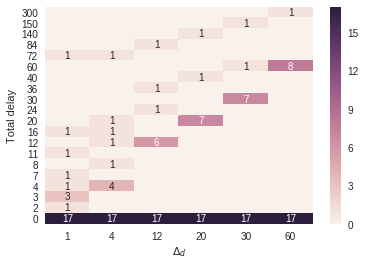

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
annotation = histdata.applymap(lambda x: '' if x == 0.0 else '%i' % x).values

seaborn.heatmap(histdata, annot=annotation, fmt = '', ax=ax);
ax.invert_yaxis()#
ax.set_xlabel('$\Delta_d$')
ax.set_ylabel('Total delay')

pdf = matplotlib.backends.backend_pdf.PdfPages('qubo_icm_3.pdf');
pdf.savefig(figure=fig);
pdf.close();

In [29]:
histdata.to_csv('icm_3_histogram_data.csv')

In [30]:
for d in range(60 + 1):
    if d not in histdata.columns:
        histdata[d] = np.zeros(len(histdata), dtype=float)

In [31]:
histdata.sort_index(axis=1, inplace=True)

In [32]:
for t in range(histdata.index.max() + 1):
    if t not in histdata.index:
        histdata.loc[t] = np.zeros(60 + 1)

In [33]:
histdata.sort_index(inplace=True)

In [34]:
#histdata = histdata.apply(np.log)

In [35]:
#histdata.replace([np.inf, -np.inf], 0.0, inplace=True)
#histdata

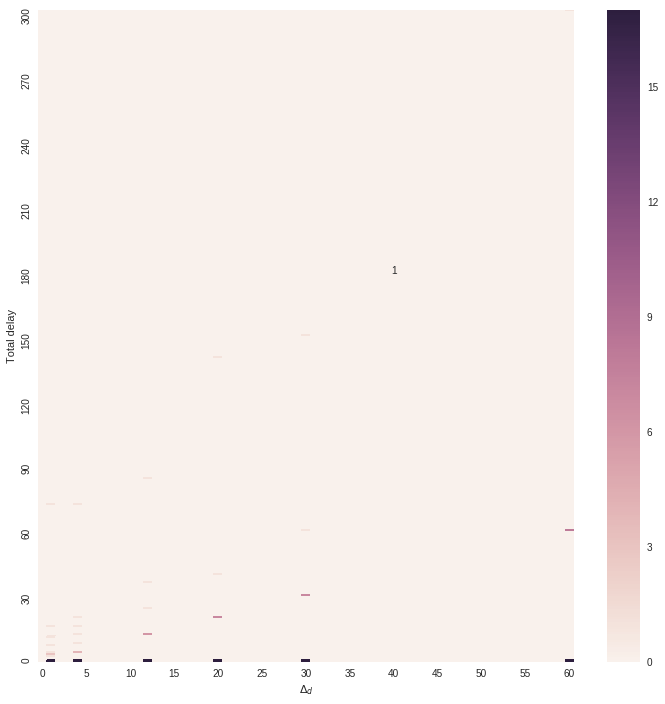

In [36]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
annotation = histdata.applymap(lambda x: '' if x == 0.0 else '%i' % x).values

seaborn.heatmap(histdata, annot=annotation, fmt = '', ax=ax, xticklabels=5, yticklabels=30);
ax.invert_yaxis()#
ax.set_xlabel('$\Delta_d$')
ax.set_ylabel('Total delay')
#ax.set_xticks([1, 4, 12, 20, 30, 60])

pdf = matplotlib.backends.backend_pdf.PdfPages('qubo_icm_3.pdf');
pdf.savefig(figure=fig);
pdf.close();